In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.cm as cm
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA, IncrementalPCA
import numpy as np
import  os
from os.path import basename
import sys
%matplotlib inline
# filename='allen_both_new.csv'
filename='all_main.csv'
df = pd.read_csv(filename)
df=df.fillna(df.mean())
X = df.loc[:, 'm1':'m22'].values
y = df.loc[:, 'class']

In [3]:
df

,class,m1,m2,m3,m4,m5,m6,m7,m8,m9,...,m13,m14,m15,m16,m17,m18,m19,m20,m21,m22
0,1.0,17523.20,1.0,5.0,11.0,66.92,70.89,37.48,1.76,234.80,...,112.86,4.0,21.34,0.92,37.0,0.80,0.82,83.09,99.61,1.03
1,1.0,17523.20,1.0,9.0,19.0,70.70,162.04,94.82,0.64,669.22,...,217.88,5.0,35.22,0.92,144.0,0.53,0.89,75.76,61.78,1.03
2,1.0,17523.20,1.0,1.0,3.0,55.94,17.73,10.09,3.19,80.37,...,62.63,0.0,26.78,0.97,19.0,1.00,0.00,0.00,0.00,1.02
3,1.0,17523.20,1.0,3.0,7.0,18.95,88.54,10.31,3.94,132.10,...,85.20,2.0,18.87,0.97,22.0,0.67,0.61,58.73,60.91,1.02
4,1.0,54617.40,1.0,3.0,7.0,58.52,49.60,29.73,3.13,189.07,...,88.39,2.0,27.00,0.93,38.0,0.67,1.36,58.96,45.25,1.03
5,1.0,54617.40,1.0,6.0,13.0,90.96,102.84,52.91,1.63,461.90,...,149.58,3.0,35.53,0.92,92.0,0.50,0.98,54.90,56.32,1.04
6,1.0,54617.40,1.0,2.0,5.0,89.04,31.85,3.24,8.71,138.99,...,92.24,1.0,27.79,0.99,15.0,0.50,1.35,42.46,25.68,1.00
7,1.0,12564.70,1.0,1.0,3.0,49.73,88.22,39.59,1.53,142.13,...,126.26,0.0,47.37,0.96,37.0,1.00,0.00,0.00,0.00,1.03
8,1.0,12564.70,1.0,12.0,25.0,118.46,136.17,88.57,0.45,992.12,...,182.05,6.0,39.68,0.89,297.0,0.50,0.90,52.78,51.23,1.04
9,1.0,12564.70,1.0,5.0,11.0,102.91,79.48,66.36,0.59,440.98,...,173.01,3.0,40.08,0.86,146.0,0.47,0.63,72.21,77.29,1.06


In [4]:
df[df['class']==1].describe()

,class,m1,m2,m3,m4,m5,m6,m7,m8,m9,...,m13,m14,m15,m16,m17,m18,m19,m20,m21,m22
count,2213.0,2213.000000,2213.0,2213.000000,2213.000000,2213.000000,2213.000000,2213.000000,2213.000000,2213.000000,...,2213.000000,2213.000000,2213.000000,2213.000000,2213.000000,2213.000000,2213.000000,2213.000000,2213.000000,2213.000000
mean,1.0,13489.116326,1.0,4.338455,9.676909,76.178495,98.205282,43.660574,1.771704,333.060389,...,143.434844,2.574785,33.479684,0.933868,77.865341,0.616109,0.913547,54.600393,50.378803,1.021848
std,0.0,7772.630246,0.0,2.864124,5.728249,45.918115,58.459531,23.953476,1.752783,245.289650,...,68.806668,1.840973,13.261293,0.029287,58.949590,0.208579,0.646666,26.713008,24.911191,0.091250
min,1.0,2735.210000,1.0,1.000000,3.000000,0.830000,8.680000,0.000000,0.350000,19.850000,...,8.360000,0.000000,6.610000,0.790000,5.000000,0.130000,0.000000,0.000000,0.000000,0.000000
25%,1.0,7974.960000,1.0,2.000000,5.000000,42.750000,51.890000,25.800000,0.860000,158.360000,...,95.170000,1.000000,23.700000,0.920000,35.000000,0.500000,0.600000,45.680000,42.370000,1.020000
50%,1.0,11627.800000,1.0,4.000000,9.000000,69.280000,90.220000,40.990000,1.190000,276.120000,...,138.220000,2.000000,31.770000,0.940000,64.000000,0.590000,0.890000,59.260000,54.750000,1.030000
75%,1.0,16344.300000,1.0,6.000000,13.000000,100.790000,129.700000,59.220000,1.830000,442.440000,...,183.670000,4.000000,41.150000,0.950000,105.000000,0.750000,1.200000,70.900000,65.440000,1.040000
max,1.0,54617.400000,1.0,32.000000,65.000000,364.910000,448.200000,165.740000,15.310000,1963.170000,...,480.460000,15.000000,102.460000,1.000000,488.000000,1.000000,3.800000,144.190000,140.230000,1.130000


# Describe()

In [5]:
a=df[df['class']==1].describe().iloc[1:3].T
b=df[df['class']==2].describe().iloc[1:3].T
c=df[df['class']==3].describe().iloc[1:3].T
d=df[df['class']==4].describe().iloc[1:3].T
e=df[df['class']==5].describe().iloc[1:3].T
f=df[df['class']==6].describe().iloc[1:3].T
g=df[df['class']==7].describe().iloc[1:3].T
h=df[df['class']==8].describe().iloc[1:3].T
i=df[df['class']==9].describe().iloc[1:3].T
j=df[df['class']==10].describe().iloc[1:3].T

l=pd.concat([a, b,c,d,e,f,g,h,i,j], axis=1)

In [6]:
# c.to_csv("rato_camundongo.csv")
l.to_csv("main_branches_describe.csv")

In [7]:
l.to_latex(index=True)

'\\begin{tabular}{lrrrrrrrrrrrrrrrrrrrr}\n\\toprule\n{} &          mean &          std &          mean &           std &          mean &            std &          mean &            std &         mean &          std &         mean &          std &          mean &            std &         mean &          std &          mean &           std &          mean &          std \\\\\n\\midrule\nclass &      1.000000 &     0.000000 &      2.000000 &      0.000000 &      3.000000 &       0.000000 &      4.000000 &       0.000000 &     5.000000 &     0.000000 &     6.000000 &     0.000000 &      7.000000 &       0.000000 &     8.000000 &     0.000000 &      9.000000 &      0.000000 &     10.000000 &     0.000000 \\\\\nm1    &  13489.116326 &  7772.630246 &  27055.056726 &  19923.237755 &  87775.111842 &  549112.299436 &  90590.707975 &  236141.386001 &  8994.758705 &  4789.554241 &  7407.119813 &  3980.217484 &  39123.360405 &  103067.573694 &  9361.903380 &  4461.806451 &  10483.723626 &  24884.18

# TSNE

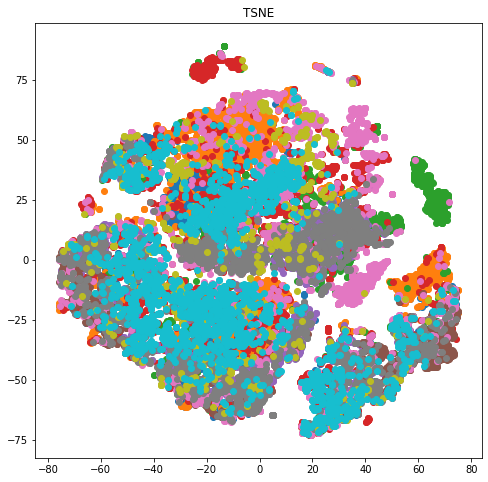

In [21]:
from sklearn.manifold import TSNE
tnse = TSNE(n_components=2).fit_transform(X)

# colors = ['navy', 'turquoise']
# colors = cm.Set3(np.linspace(0, 1, 10))

colors = cm.tab10(np.linspace(0, 1, 10))
for X_transformed, title in [ (tnse, "TSNE")]:
    plt.figure(figsize=(8, 8))
    for  c,i, target_name in zip(colors, [1,2,3,4,5,6,7,8,9,10], ['C1' ,'C2','C3','C4','C5','C6','C7','C8','C9','C10']):
        plt.scatter(
            X_transformed[y == i, 0],
            X_transformed[y == i, 1],
            color=c,
            #edgecolor=c, facecolor=c,
            #alpha=0.8,
            label=str(target_name))

#     if "Incremental" in title:
#         err = np.abs(np.abs(Y) - np.abs(Y_ipca)).mean()
#         plt.title(title + " of neuron dataset\nMean absolute unsigned error "
#                   "%.6f" % err)

#     else:
    plt.title(title)
plt.show()
# for X_transformed, title in [(tnse, "TSNE")]:
#     plt.figure(figsize=(8, 8))
#     for color, i, target_name in zip(colors, [1, 2], ["interneurônio","piramidal"]):
#         plt.scatter(X_transformed[y == i, 0], X_transformed[y == i, 1],
#                     color=color, lw=2, label=target_name)

#     if "Incremental" in title:
#         err = np.abs(np.abs(X_pca) - np.abs(X_ipca)).mean()
# #         plt.title(title + " of iris dataset\nMean absolute unsigned error "
# #                   "%.6f" % err)
# #     else:
# #         plt.title(title + " of iris dataset")
#     plt.legend(loc="best", shadow=False, scatterpoints=1)
# #     plt.xlabel("PC1 "+str(round((pca.explained_variance_ratio_[0])*100,2))+"%")
# #     plt.ylabel("PC2 "+str(round((pca.explained_variance_ratio_[1])*100,2))+"%")
#     plt.savefig("interneuron_pyramidal_tsne.pdf")
# #     plt.axis([-4, 4, -1.5, 1.5])
# plt.show()


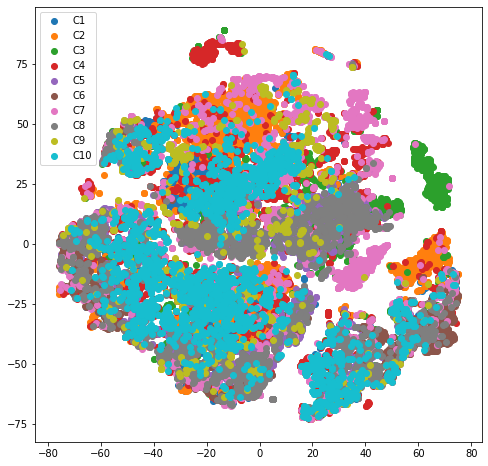

In [25]:
colors = cm.tab10(np.linspace(0, 1, 10))
for X_transformed, title in [ (tnse, "")]:
    plt.figure(figsize=(8, 8))
    for  c,i, target_name in zip(colors, [1,2,3,4,5,6,7,8,9,10], ['C1' ,'C2','C3','C4','C5','C6','C7','C8','C9','C10']):
        plt.scatter(
            X_transformed[y == i, 0],
            X_transformed[y == i, 1],
            color=c,
            #edgecolor=c, facecolor=c,
            #alpha=0.8,
            label=str(target_name))

#     if "Incremental" in title:
#         err = np.abs(np.abs(Y) - np.abs(Y_ipca)).mean()
#         plt.title(title + " of neuron dataset\nMean absolute unsigned error "
#                   "%.6f" % err)

#     else:
    plt.title(title)


plt.legend()
plt.savefig("main_branches_tsne.pdf")
plt.show()

# PCA

[0.30949443 0.12544047 0.06976679]
[0.31850314 0.13337683 0.10180496]


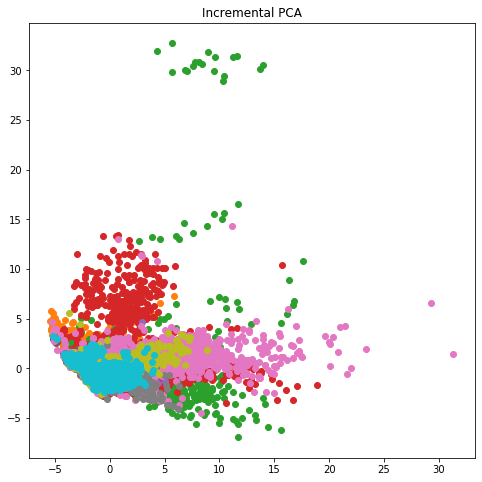

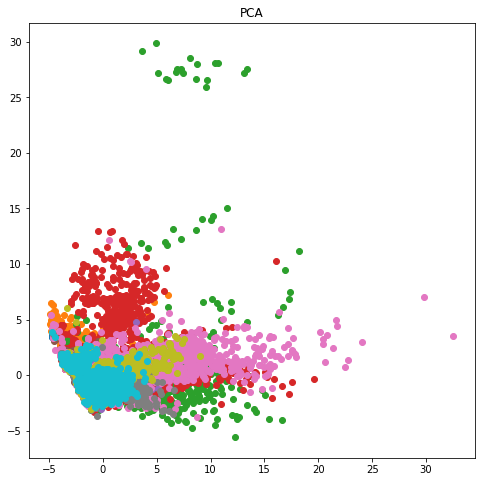

In [12]:

import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.decomposition import PCA, IncrementalPCA

n_components = 3
X= StandardScaler().fit_transform(X)

ipca = IncrementalPCA(n_components=n_components, batch_size=10)
X_ipca = ipca.fit_transform(X)
print(ipca.explained_variance_ratio_)
# pca = PCA(n_components=n_components)
pca = PCA(copy=True, iterated_power='auto', n_components=n_components, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)
X_pca = pca.fit_transform(X)
print(pca.explained_variance_ratio_)
# print(pca.singular_values_) 
# colors = ['navy', 'turquoise']

# for X_transformed, title in [(X_ipca, "Incremental PCA"), (X_pca, "PCA")]:
#     plt.figure(figsize=(8, 8))
#     for color, i, target_name in zip(colors, [1, 2], ["interneurônio","piramidal"]):
#         plt.scatter(X_transformed[y == i, 0], X_transformed[y == i, 1],
#                     color=color, lw=2, label=target_name)

#     if "Incremental" in title:
#         err = np.abs(np.abs(X_pca) - np.abs(X_ipca)).mean()
# #         plt.title(title + " of iris dataset\nMean absolute unsigned error "
# #                   "%.6f" % err)
# #     else:
# #         plt.title(title + " of iris dataset")
#     plt.legend(loc="best", shadow=False, scatterpoints=1)
#     plt.xlabel("PC1 "+str(round((pca.explained_variance_ratio_[0])*100,2))+"%")
#     plt.ylabel("PC2 "+str(round((pca.explained_variance_ratio_[1])*100,2))+"%")
#     plt.savefig("interneuronio_piramidal.pdf")
# #     plt.axis([-4, 4, -1.5, 1.5])
# plt.show()

colors = cm.tab10(np.linspace(0, 1, 10))
for X_transformed, title in [(X_ipca, "Incremental PCA"), (X_pca, "PCA")]:
    plt.figure(figsize=(8, 8))
    for  c,i, target_name in zip(colors, [1,2,3,4,5,6,7,8,9,10], ['C1' ,'C2','C3','C4','C5','C6','C7','C8','C9','C10']):
        plt.scatter(
            X_transformed[y == i, 0],
            X_transformed[y == i, 1],
            color=c,
            #edgecolor=c, facecolor=c,
            #alpha=0.8,
            label=str(target_name))

#     if "Incremental" in title:
#         err = np.abs(np.abs(Y) - np.abs(Y_ipca)).mean()
#         plt.title(title + " of neuron dataset\nMean absolute unsigned error "
#                   "%.6f" % err)

#     else:
    plt.title(title)
plt.show()


In [17]:
pca.explained_variance_ratio_

array([0.31850314, 0.13337683, 0.10180496])